<a href="https://colab.research.google.com/github/dcgkpindia/DeepLearning/blob/main/Handwritten_Digit_Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><center> Handwritten Digit Classification Using Ann - Deep Learning using MNIST DataSet </center></b>

## Import the Libraries

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Load the MNIST DataSet from Keras

In [4]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

### Check the shape of Data

In [6]:
print("Shape of X_train dataset is : ", X_train.shape)
print("Shape of y_train dataset is : ", y_train.shape)
print("Shape of X_test dataset is : ", X_test.shape)
print("Shape of y_test dataset is : ", y_test.shape)

Shape of X_train dataset is :  (60000, 28, 28)
Shape of y_train dataset is :  (60000,)
Shape of X_test dataset is :  (10000, 28, 28)
Shape of y_test dataset is :  (10000,)


This data is 3D array which has 60000 data in X_train with 28 by 28 numpy array

### We can check the image also randomly

In [7]:
import matplotlib.pyplot as plt

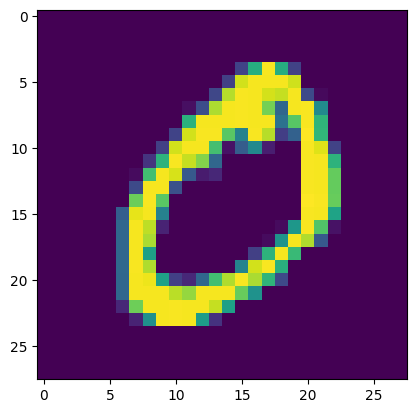

In [9]:
plt.imshow(X_train[1])

Since the array values are between the range of 0 to 255 we have bring this between 0 and 1. To do this we can simply divide the array values with 255

In [10]:
X_train = X_train/255
X_test = X_test/255

Let us check now what is the output of the zeroth element

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

We can see the values are between 0 and 1 now

## Model Building

In [28]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=25, validation_split = 0.1)

Epoch 1/25
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2698 - accuracy: 0.9227 - val_loss: 0.1180 - val_accuracy: 0.9670
Epoch 2/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1141 - accuracy: 0.9651 - val_loss: 0.0910 - val_accuracy: 0.9730
Epoch 3/25
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0763 - accuracy: 0.9757 - val_loss: 0.0904 - val_accuracy: 0.9718
Epoch 4/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0580 - accuracy: 0.9821 - val_loss: 0.0885 - val_accuracy: 0.9752
Epoch 5/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0446 - accuracy: 0.9855 - val_loss: 0.0888 - val_accuracy: 0.9772
Epoch 6/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0835 - val_accuracy: 0.9775
Epoch 7/25
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0835 - val_accuracy:

In [33]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [34]:
y_pred = y_prob.argmax(axis = 1)

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9775

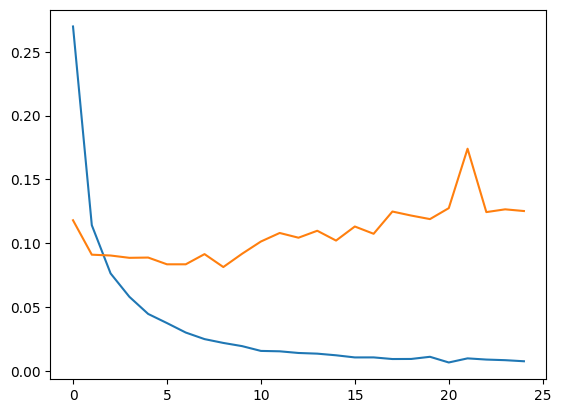

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

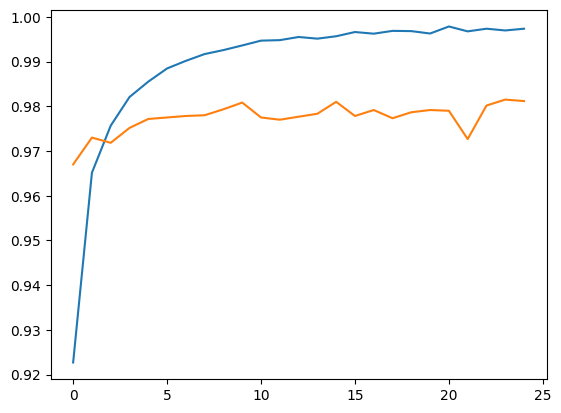

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

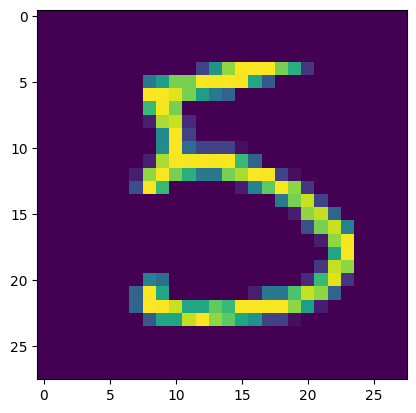

In [42]:
plt.imshow(X_test[15])

In [43]:
model.predict(X_test[15].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 43ms/step


array([5])